We're going to use the Pluralsight courses dataset

In [8]:
!pip install pandas
!pip install scikit-learn
!pip install nltk 
!pip install gensim
!pip install keras
!pip install tensorflow
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 267.9/267.9 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 23.9/23.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 272.9/272.9 MB 1.1 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.6/2.6 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 24.4/24.4 MB 1.2 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     --

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 736.4 kB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 968.8 kB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

content_df = pd.read_csv('../Data Files/pluralsight_courses.csv')

In [2]:
text_data_df = content_df[['CourseId','CourseTitle','Description']]
text_data_df.head(100)


,CourseId,CourseTitle,Description
0,abts-advanced-topics,BizTalk 2006 Business Process Management,This course covers Business Process Management...
1,abts-fundamentals,BizTalk 2006 Fundamentals,Despite the trend towards service-oriented arc...
2,agile-team-practice-fundamentals,Agile Team Practices with Scrum,This course is much different than most of the...
3,appsrv-fundamentals,Windows Server AppFabric Fundamentals,NaN
4,aspdotnet-advanced-topics,ASP.NET 3.5 Advanced Topics,This course covers more advanced topics in ASP...
...,...,...,...
95,intro-sql-server,Introduction to SQL Server,This course starts with a high level introduct...
96,ssrs-adv,Reporting Services Advanced Topics,This course covers advanced topics in Reportin...
97,jscript-fundamentals,JavaScript Fundamentals,This course introduces JavaScript by examining...
98,wp7-core,Core Windows Phone 7 Development,This course will introduce you to core concept...


In [3]:
missing_values = content_df.isnull().sum()
print(missing_values)

CourseId             0
CourseTitle          0
DurationInSeconds    0
ReleaseDate          0
Description          5
AssessmentStatus     0
IsCourseRetired      0
dtype: int64


In [4]:
text_data_df.dropna(subset=['Description'], inplace=True)
missing_values = text_data_df.isnull().sum()
print(missing_values)

CourseId       0
CourseTitle    0
Description    0
dtype: int64


C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\1446885945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df.dropna(subset=['Description'], inplace=True)


Lowercasing the data

In [5]:
text_data_df['CourseTitle_Lowercased'] = content_df['CourseTitle'].str.lower()
text_data_df['Description_Lowercased'] = content_df['Description'].str.lower()

C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\723392457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['CourseTitle_Lowercased'] = content_df['CourseTitle'].str.lower()
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\723392457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['Description_Lowercased'] = content_df['Description'].str.lower()


In [6]:
text_data_df.head()
missing_values = text_data_df.isnull().sum()
print(missing_values)

CourseId                  0
CourseTitle               0
Description               0
CourseTitle_Lowercased    0
Description_Lowercased    0
dtype: int64


Tokenization

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_data_df['CourseTitle_tokens'] = text_data_df['CourseTitle_Lowercased'].apply(word_tokenize)
text_data_df['Description_tokens'] = text_data_df['Description_Lowercased'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abirr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\1471205165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['CourseTitle_tokens'] = text_data_df['CourseTitle_Lowercased'].apply(word_tokenize)
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\1471205165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['Description_tokens'] = 

In [10]:
text_data_df.head()

,CourseId,CourseTitle,Description,CourseTitle_Lowercased,Description_Lowercased,CourseTitle_tokens,Description_tokens
0,abts-advanced-topics,BizTalk 2006 Business Process Management,This course covers Business Process Management...,biztalk 2006 business process management,this course covers business process management...,"[biztalk, 2006, business, process, management]","[this, course, covers, business, process, mana..."
1,abts-fundamentals,BizTalk 2006 Fundamentals,Despite the trend towards service-oriented arc...,biztalk 2006 fundamentals,despite the trend towards service-oriented arc...,"[biztalk, 2006, fundamentals]","[despite, the, trend, towards, service-oriente..."
2,agile-team-practice-fundamentals,Agile Team Practices with Scrum,This course is much different than most of the...,agile team practices with scrum,this course is much different than most of the...,"[agile, team, practices, with, scrum]","[this, course, is, much, different, than, most..."
4,aspdotnet-advanced-topics,ASP.NET 3.5 Advanced Topics,This course covers more advanced topics in ASP...,asp.net 3.5 advanced topics,this course covers more advanced topics in asp...,"[asp.net, 3.5, advanced, topics]","[this, course, covers, more, advanced, topics,..."
5,aspdotnet-ajax-advanced-topics,ASP.NET Ajax Advanced Topics,This course covers advanced topics in ASP.NET ...,asp.net ajax advanced topics,this course covers advanced topics in asp.net ...,"[asp.net, ajax, advanced, topics]","[this, course, covers, advanced, topics, in, a..."


Filtering stop words

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

text_data_df['CourseTitle_noStop'] = text_data_df['CourseTitle_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
text_data_df['Description_noStop'] = text_data_df['Description_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abirr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\546236627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['CourseTitle_noStop'] = text_data_df['CourseTitle_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\546236627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
text_data_df['CourseTitle_lemmatized'] = text_data_df['CourseTitle_noStop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
text_data_df['Description_lemmatized'] = text_data_df['Description_noStop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abirr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Abirr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\2203938709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df['CourseTitle_lemmatized'] = text_data_df['CourseTitle_noStop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
C:\Users\Abirr\AppData\Local\Temp\ipykernel_30020\2203938709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [30]:
text_data_df.head()

,CourseId,CourseTitle,Description,CourseTitle_Lowercased,Description_Lowercased,CourseTitle_tokens,Description_tokens,CourseTitle_noStop,Description_noStop,CourseTitle_lemmatized,Description_lemmatized
0,abts-advanced-topics,BizTalk 2006 Business Process Management,This course covers Business Process Management...,biztalk 2006 business process management,this course covers business process management...,"[biztalk, 2006, business, process, management]","[this, course, covers, business, process, mana...","[biztalk, 2006, business, process, management]","[course, covers, business, process, management...","[biztalk, 2006, business, process, management]","[course, cover, business, process, management,..."
1,abts-fundamentals,BizTalk 2006 Fundamentals,Despite the trend towards service-oriented arc...,biztalk 2006 fundamentals,despite the trend towards service-oriented arc...,"[biztalk, 2006, fundamentals]","[despite, the, trend, towards, service-oriente...","[biztalk, 2006, fundamentals]","[despite, trend, towards, service-oriented, ar...","[biztalk, 2006, fundamental]","[despite, trend, towards, service-oriented, ar..."
2,agile-team-practice-fundamentals,Agile Team Practices with Scrum,This course is much different than most of the...,agile team practices with scrum,this course is much different than most of the...,"[agile, team, practices, with, scrum]","[this, course, is, much, different, than, most...","[agile, team, practices, scrum]","[course, much, different, courses, pluralsight...","[agile, team, practice, scrum]","[course, much, different, course, pluralsight,..."
4,aspdotnet-advanced-topics,ASP.NET 3.5 Advanced Topics,This course covers more advanced topics in ASP...,asp.net 3.5 advanced topics,this course covers more advanced topics in asp...,"[asp.net, 3.5, advanced, topics]","[this, course, covers, more, advanced, topics,...","[asp.net, 3.5, advanced, topics]","[course, covers, advanced, topics, asp.net, 3....","[asp.net, 3.5, advanced, topic]","[course, cover, advanced, topic, asp.net, 3.5,..."
5,aspdotnet-ajax-advanced-topics,ASP.NET Ajax Advanced Topics,This course covers advanced topics in ASP.NET ...,asp.net ajax advanced topics,this course covers advanced topics in asp.net ...,"[asp.net, ajax, advanced, topics]","[this, course, covers, advanced, topics, in, a...","[asp.net, ajax, advanced, topics]","[course, covers, advanced, topics, asp.net, aj...","[asp.net, ajax, advanced, topic]","[course, cover, advanced, topic, asp.net, ajax..."


Preprocessed Data

In [13]:
preprocessed_df = text_data_df[['CourseId','CourseTitle_lemmatized','Description_lemmatized']]
preprocessed_df = preprocessed_df.reset_index(drop=True)
preprocessed_df.head()

,CourseId,CourseTitle_lemmatized,Description_lemmatized
0,abts-advanced-topics,"[biztalk, 2006, business, process, management]","[course, cover, business, process, management,..."
1,abts-fundamentals,"[biztalk, 2006, fundamental]","[despite, trend, towards, service-oriented, ar..."
2,agile-team-practice-fundamentals,"[agile, team, practice, scrum]","[course, much, different, course, pluralsight,..."
3,aspdotnet-advanced-topics,"[asp.net, 3.5, advanced, topic]","[course, cover, advanced, topic, asp.net, 3.5,..."
4,aspdotnet-ajax-advanced-topics,"[asp.net, ajax, advanced, topic]","[course, cover, advanced, topic, asp.net, ajax..."


In [14]:
preprocessed_df = preprocessed_df.reset_index(drop=True)
preprocessed_df.head()

,CourseId,CourseTitle_lemmatized,Description_lemmatized
0,abts-advanced-topics,"[biztalk, 2006, business, process, management]","[course, cover, business, process, management,..."
1,abts-fundamentals,"[biztalk, 2006, fundamental]","[despite, trend, towards, service-oriented, ar..."
2,agile-team-practice-fundamentals,"[agile, team, practice, scrum]","[course, much, different, course, pluralsight,..."
3,aspdotnet-advanced-topics,"[asp.net, 3.5, advanced, topic]","[course, cover, advanced, topic, asp.net, 3.5,..."
4,aspdotnet-ajax-advanced-topics,"[asp.net, ajax, advanced, topic]","[course, cover, advanced, topic, asp.net, ajax..."


In [15]:
print(preprocessed_df.isnull().sum())


CourseId                  0
CourseTitle_lemmatized    0
Description_lemmatized    0
dtype: int64


In [16]:
title_desc = []
for i in range(preprocessed_df.shape[0]):
    title_desc.append(' '.join(preprocessed_df['CourseTitle_lemmatized'][i]) + ' ' + ' '.join(preprocessed_df['Description_lemmatized'][i]))

# add the concatenated text as a new column in the dataframe
preprocessed_df['title_desc'] = title_desc



In [17]:
preprocessed_df.shape
print(preprocessed_df.loc[7864].to_dict())


{'CourseId': 'android-fundamentals-menus', 'CourseTitle_lemmatized': ['android', 'fundamental', ':', 'menu'], 'Description_lemmatized': ['menu', 'essential', 'building', 'block', 'android', 'application', '.', 'course', ',', 'android', 'fundamental', ':', 'menu', ',', 'gain', 'ability', 'create', 'display', 'menu', 'android', 'apps', '.', 'first', ',', 'learn', 'different', 'menu', 'type', 'create', '.', 'next', ',', 'explore', 'build', 'advanced', 'menu', 'like', 'checkable', 'menu', 'intent-based', 'menu', '.', 'finally', ',', 'examine', 'various', 'design', 'guideline', 'build', 'menu', 'right', 'way', '.', '’', 'finished', 'course', ',', 'skill', 'knowledge', 'android', 'menu', 'needed', 'build', 'effective', 'user-friendly', 'menu', 'android', 'apps', '.'], 'title_desc': 'android fundamental : menu menu essential building block android application . course , android fundamental : menu , gain ability create display menu android apps . first , learn different menu type create . next

TF-IDF


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( ngram_range=(1, 2), smooth_idf=True, analyzer='word')
vectorizer.fit(preprocessed_df['title_desc'])
tfidf_vectors = vectorizer.transform(preprocessed_df['title_desc'])


In [97]:
print(tfidf_vectors.shape)


(8011, 273825)


In [108]:
print(tfidf_vectors[0])

  (0, 797)	0.18452344858941094
  (0, 31975)	0.18452344858941094
  (0, 114215)	0.18452344858941094
  (0, 24707)	0.18452344858941094
  (0, 214083)	0.18452344858941094
  (0, 265957)	0.11179906574274699
  (0, 120514)	0.16271518974229834
  (0, 681)	0.18452344858941094
  (0, 213454)	0.17647466912252965
  (0, 28970)	0.143245010448717
  (0, 94031)	0.15700448982894832
  (0, 147003)	0.15068294994568213
  (0, 55636)	0.17647466912252965
  (0, 54476)	0.08078854838368074
  (0, 146931)	0.1288746910985695
  (0, 187391)	0.3254303794845967
  (0, 33906)	0.27208214102015393
  (0, 679)	0.18452344858941094
  (0, 28964)	0.1707639692091796
  (0, 787)	0.11572605168825435
  (0, 31974)	0.1707639692091796
  (0, 114212)	0.12456580163358279
  (0, 24705)	0.16633440622565981
  (0, 214011)	0.06429184832060392
  (0, 265783)	0.06424541383705157
  (0, 119993)	0.06781830420214832
  (0, 213445)	0.06270651831502919
  (0, 93957)	0.11455356131662009
  (0, 55572)	0.056243068853722634
  (0, 54211)	0.025502058460385158
  (0, 146

## Check the names corresponding to the tfidf scores of the first course, let's see if the tfidf scores actually capture the importance of keywords, maybe the reason for the algorithm's failure

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(tfidf_vectors, test_size=0.2, random_state=42)


In [40]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

## took out the the max_features=10000 and max_df=0.5 parts in the vectorizer object, since max_features is measured based on most frequent terms, not necessarily buzz words, the algorithms did significantly worse though, so there is something else we need to do  

In [99]:
kmeans_model = KMeans(n_clusters=10, random_state=42, verbose=1)
kmeans_model.fit(X_train)


/home/bpmj2339/virtualenv/CourseRecSystem/3.9/lib64/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 12191.108529131352.
Iteration 1, inertia 6255.079824752942.
Iteration 2, inertia 6235.867405846607.
Iteration 3, inertia 6224.708508753209.
Iteration 4, inertia 6220.641253545696.
Iteration 5, inertia 6217.148516125402.
Iteration 6, inertia 6214.71997690998.
Iteration 7, inertia 6212.969454727784.
Iteration 8, inertia 6211.518732356575.
Iteration 9, inertia 6210.689953091974.
Iteration 10, inertia 6210.181112725555.
Iteration 11, inertia 6209.778975105396.
Iteration 12, inertia 6209.470287224801.
Iteration 13, inertia 6209.2767949134695.
Iteration 14, inertia 6209.06200972753.
Iteration 15, inertia 6208.920900228287.
Iteration 16, inertia 6208.865723420559.
Iteration 17, inertia 6208.813285368284.
Iteration 18, inertia 6208.745787711019.
Iteration 19, inertia 6208.657198097117.
Iteration 20, inertia 6208.616570890796.
Iteration 21, inertia 6208.58206956526.
Iteration 22, inertia 6208.549880476576.
Iteration 23, inertia 6208.529032909071.
Ite

KMeans(n_clusters=10, random_state=42, verbose=1)

In [100]:
kmeans_train_score = silhouette_score(X_train, kmeans_model.labels_)
kmeans_test_score = silhouette_score(X_test, kmeans_model.predict(X_test))
print(f"KMeans Train Silhouette Score: {kmeans_train_score}")
print(f"KMeans Test Silhouette Score: {kmeans_test_score}")

KMeans Train Silhouette Score: 0.007419314894272298
KMeans Test Silhouette Score: 0.006968676147693394


In [77]:
#Hyperparameter Tunig for K-Means
from sklearn.model_selection import GridSearchCV


param_grid = {'n_clusters': [5, 10, 15, 20],
              'init': ['k-means++', 'random'],
              'max_iter': [100, 200, 300, 400]}


kmeans_hypert_model = KMeans(random_state=42)

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=kmeans_hypert_model, param_grid=param_grid, cv=4, verbose=4)

# Fit the grid search to the data
grid_search.fit(X_train)

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV 1/4] END init=k-means++, max_iter=100, n_clusters=5;, score=-1539.475 total time=   2.3s
[CV 2/4] END init=k-means++, max_iter=100, n_clusters=5;, score=-1537.547 total time=   3.4s
[CV 3/4] END init=k-means++, max_iter=100, n_clusters=5;, score=-1538.405 total time=   2.5s
[CV 4/4] END init=k-means++, max_iter=100, n_clusters=5;, score=-1542.002 total time=   2.8s
[CV 1/4] END init=k-means++, max_iter=100, n_clusters=10;, score=-1512.218 total time=   4.5s
[CV 2/4] END init=k-means++, max_iter=100, n_clusters=10;, score=-1512.124 total time=   5.0s
[CV 3/4] END init=k-means++, max_iter=100, n_clusters=10;, score=-1511.867 total time=   4.2s
[CV 4/4] END init=k-means++, max_iter=100, n_clusters=10;, score=-1516.439 total time=   4.7s
[CV 1/4] END init=k-means++, max_iter=100, n_clusters=15;, score=-1489.092 total time=   8.0s
[CV 2/4] END init=k-means++, max_iter=100, n_clusters=15;, score=-1490.502 total time=   6.9s
[C

## kmeans produced terrible results, possibly due to the sparse matrix data, maybe kmeans can't learn from it, maybe try raw text data later on or find another alternative (TRY CONVERTING to.array() and retraining kmeans, maybe making it a dense matrix would work)

### UPDATED KMEANS AFTER HYPERPARAMETER TUNING

In [80]:
kmeans_model = KMeans(n_clusters=20, init='k-means++', max_iter=200, random_state=42, verbose=1)
kmeans_model.fit(X_train)
kmeans_train_score = silhouette_score(X_train, kmeans_model.labels_)
kmeans_test_score = silhouette_score(X_test, kmeans_model.predict(X_test))
print(f"KMeans Train Silhouette Score: {kmeans_train_score}")
print(f"KMeans Test Silhouette Score: {kmeans_test_score}")

Initialization complete
Iteration 0, inertia 11328.503612191951.
Iteration 1, inertia 5987.702209774352.
Iteration 2, inertia 5930.278621518433.
Iteration 3, inertia 5901.069652097048.
Iteration 4, inertia 5887.030484884746.
Iteration 5, inertia 5882.427289749717.
Iteration 6, inertia 5879.640536739656.
Iteration 7, inertia 5877.063628078243.
Iteration 8, inertia 5874.700398344227.
Iteration 9, inertia 5872.719069677004.
Iteration 10, inertia 5871.617127028564.
Iteration 11, inertia 5871.131866684791.
Iteration 12, inertia 5870.761559394086.
Iteration 13, inertia 5870.412723074928.
Iteration 14, inertia 5870.086887969056.
Iteration 15, inertia 5869.71872338701.
Iteration 16, inertia 5869.477142596658.
Iteration 17, inertia 5869.30388555426.
Iteration 18, inertia 5869.121017620193.
Iteration 19, inertia 5868.915943040483.
Iteration 20, inertia 5868.689396805644.
Iteration 21, inertia 5868.288112664854.
Iteration 22, inertia 5867.740299317173.
Iteration 23, inertia 5867.029467179732.
Ite

In [83]:
agg_model = AgglomerativeClustering(n_clusters=10)
agg_model.fit(X_train.toarray())

AgglomerativeClustering(n_clusters=10)

In [84]:
agg_train_score = silhouette_score(X_train, agg_model.labels_)
agg_test_score = silhouette_score(X_test, agg_model.fit_predict(X_test.toarray()))
print(f"Agglomerative Clustering Train Silhouette Score: {agg_train_score}")
print(f"Agglomerative Clustering Test Silhouette Score: {agg_test_score}")

Agglomerative Clustering Train Silhouette Score: 0.008341712687465667
Agglomerative Clustering Test Silhouette Score: 0.010810966512350898


## tfidf is not the right choice here, it produces a sparse matrix based on the occurence of the words, not for each course individually, and if we do it for each course individually it won't capture the importance of certain words, this is the issue with tfidf so we'll move on to other methods

### TRY OUT WORD EMBEDDINGS & TOPIC MODELING INSTEAD

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': [5, 10, 15, 20],
    'linkage': ['ward', 'complete', 'average', 'single'],
}

# Create the Agglomerative Clustering model
agg_model = AgglomerativeClustering()

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=agg_model, param_grid=param_grid, cv=4, verbose=4)

# Fit the grid search to the data
grid_search.fit(X_train.toarray())

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


In [ ]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_train.toarray())

In [ ]:
dbscan_train_score = silhouette_score(X_train, dbscan_model.labels_)
dbscan_test_score = silhouette_score(X_test, dbscan_model.fit_predict(X_test.toarray()))
print(f"DBSCAN Train Silhouette Score: {dbscan_train_score}")
print(f"DBSCAN Test Silhouette Score: {dbscan_test_score}")

In [ ]:
# Define the parameter grid
param_grid = {
    'eps': [0.1, 0.5, 1.0],
    'min_samples': [3, 5, 7]
}

# Create a DBSCAN model
dbscan_model = DBSCAN()

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=dbscan_model, param_grid=param_grid, cv=4, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train.toarray())

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

### TRY OUT WORD EMBEDDINGS & TOPIC MODELING INSTEAD


In [18]:
## Tokenize title_desc column
preprocessed_df['title_desc_tokenized'] = preprocessed_df['title_desc'].apply(nltk.word_tokenize)

In [19]:
import re

# Define a regular expression pattern to match non-alphanumeric characters
pattern = r'[^a-zA-Z0-9\s]'

# Clean the tokens in each row of the 'title_desc_tokenized' column
preprocessed_df['title_desc_cleaned'] = preprocessed_df['title_desc_tokenized'].apply(lambda tokens: [re.sub(pattern, '', token) for token in tokens])

In [20]:
preprocessed_df.head(200)

,CourseId,CourseTitle_lemmatized,Description_lemmatized,title_desc,title_desc_tokenized,title_desc_cleaned
0,abts-advanced-topics,"[biztalk, 2006, business, process, management]","[course, cover, business, process, management,...",biztalk 2006 business process management cours...,"[biztalk, 2006, business, process, management,...","[biztalk, 2006, business, process, management,..."
1,abts-fundamentals,"[biztalk, 2006, fundamental]","[despite, trend, towards, service-oriented, ar...",biztalk 2006 fundamental despite trend towards...,"[biztalk, 2006, fundamental, despite, trend, t...","[biztalk, 2006, fundamental, despite, trend, t..."
2,agile-team-practice-fundamentals,"[agile, team, practice, scrum]","[course, much, different, course, pluralsight,...",agile team practice scrum course much differen...,"[agile, team, practice, scrum, course, much, d...","[agile, team, practice, scrum, course, much, d..."
3,aspdotnet-advanced-topics,"[asp.net, 3.5, advanced, topic]","[course, cover, advanced, topic, asp.net, 3.5,...",asp.net 3.5 advanced topic course cover advanc...,"[asp.net, 3.5, advanced, topic, course, cover,...","[aspnet, 35, advanced, topic, course, cover, a..."
4,aspdotnet-ajax-advanced-topics,"[asp.net, ajax, advanced, topic]","[course, cover, advanced, topic, asp.net, ajax...",asp.net ajax advanced topic course cover advan...,"[asp.net, ajax, advanced, topic, course, cover...","[aspnet, ajax, advanced, topic, course, cover,..."
...,...,...,...,...,...,...
195,intro-async-parallel-dotnet4,"[introduction, async, parallel, programming, ....","[need, make, .net, application, responsive, ?,...",introduction async parallel programming .net 4...,"[introduction, async, parallel, programming, ....","[introduction, async, parallel, programming, n..."
196,objective-c,"[introduction, objective-c]","[learning, objective-c, intimidating, develope...",introduction objective-c learning objective-c ...,"[introduction, objective-c, learning, objectiv...","[introduction, objectivec, learning, objective..."
197,azure-acs,"[microsoft, azure, access, control, service]","[window, azure, access, control, service, (, a...",microsoft azure access control service window ...,"[microsoft, azure, access, control, service, w...","[microsoft, azure, access, control, service, w..."
198,azure-caching,"[microsoft, azure, caching, service]","[window, azure, caching, service, provides, me...",microsoft azure caching service window azure c...,"[microsoft, azure, caching, service, window, a...","[microsoft, azure, caching, service, window, a..."


In [21]:
print(preprocessed_df['title_desc'][:10])



0    biztalk 2006 business process management cours...
1    biztalk 2006 fundamental despite trend towards...
2    agile team practice scrum course much differen...
3    asp.net 3.5 advanced topic course cover advanc...
4    asp.net ajax advanced topic course cover advan...
5    asp.net ajax fundamental asp.net ajax web deve...
6    asp.net ajax javascript jquery course cover de...
7    asp.net 3.5 working data asp.net established o...
8    asp.net 3.5 fundamental asp.net established on...
9    asp.net mvc fundamental asp.net mvc supplement...
Name: title_desc, dtype: object


In [25]:
import pickle

# Save the Data file as a pickle file
with open('preprocessed_df.pkl', 'wb') as f:
    pickle.dump(preprocessed_df, f)

In [22]:
from gensim.models import Word2Vec

# Train the Word2Vec model
wordembed_model = Word2Vec(preprocessed_df['title_desc_cleaned'], min_count=1, vector_size=200)


In [26]:
import pickle

# Save the Word2Vec model as a pickle file
with open('wordembed_model.pkl', 'wb') as f:
    pickle.dump(wordembed_model, f)


In [154]:
print(wordembed_model.wv.index_to_key)


['', 'll', 'course', 'learn', 'using', 'create', 'use', 'software', 'application', 'required', 'tool', 'first', 'data', 'finally', 'end', 'next', 'maya', 's', 'server', 'creating', 'also', 'project', 'tutorial', 'work', 'design', 'explore', '3d', 'technique', 'knowledge', 'get', 'new', 'service', 'build', 'feature', 'start', 'window', 'basic', 'model', 'web', 'system', 'azure', 'need', 'look', 'photoshop', 'learning', 'way', 'help', 'understanding', 'process', 'building', 'well', 'security', 'cover', 'fundamental', 'effect', 'network', 'animation', 'part', 'series', 'take', 'make', 'character', 'different', 'user', 'concept', 'skill', 'discover', 'workflow', 'code', 'finished', 'developer', 'modeling', 'game', 'management', 'time', 'begin', 'environment', 'used', 'set', 'like', 'microsoft', 'able', 'cloud', 'development', 'control', 'working', 're', 'zbrush', 'training', 'know', 'max', 'many', 'image', 'see', 'started', 'sql', 'advanced', 'business', 'texture', 'one', 'solution', 'cc',

In [157]:
wordembed_model.wv.most_similar('aspnet')


[('mvc', 0.96238112449646),
 ('angular', 0.9328572154045105),
 ('spring', 0.9277158975601196),
 ('nodejs', 0.9246835708618164),
 ('framework', 0.9149691462516785),
 ('react', 0.9072000980377197),
 ('angularjs', 0.9054121375083923),
 ('api', 0.89197838306427),
 ('net', 0.8831931948661804),
 ('php', 0.8757588267326355)]

In [367]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Get the embeddings for each course title and description
target_course = preprocessed_df.loc[preprocessed_df['CourseId'] == 'objective-c']['title_desc_cleaned'].tolist()
target_embedding = np.concatenate([wordembed_model.wv[word] for word in target_course])
target_embedding_padded = pad_sequences([target_embedding.reshape(1,-1).T], maxlen=max_len, dtype='float32', padding='post')
target_embedding_padded = target_embedding_padded.reshape(1,max_len)

# Compute the similarity scores between the target course and all other courses in the dataset
similarity_scores = {}
for index, row in preprocessed_df.iterrows():
    course_id = row['CourseId']
    course_title_desc = row['title_desc_cleaned']
    course_embedding = np.concatenate([wordembed_model.wv[word] for word in course_title_desc])

    course_embedding_padded = pad_sequences([course_embedding], maxlen=max_len, dtype='float32', padding='post').reshape(1,max_len)
    similarity_scores[course_id] = cosine_similarity(target_embedding_padded, course_embedding_padded)[0][0]
    
# Sort the courses by similarity score and return the top n courses
similar_courses = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20]


In [368]:
print(sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True))

[('objective-c', 0.9999998), ('red-hat-enterprise-linux-shell-fundamentals', 0.31969732), ('hacking-user-experience', 0.31824902), ('administering-elasticsearch-cluster', 0.3167433), ('game-programming-python-pygame', 0.31488556), ('java1', 0.31107688), ('star-schema-foundations', 0.3082356), ('go-fundamentals', 0.30698982), ('unity-introduction-entity-component-system', 0.30639046), ('better-css', 0.3020801), ('c-programming-language-in-action', 0.3005743), ('vmware-advanced-features-up-close', 0.29901752), ('windows-powershell-best-practices-patterns', 0.29608387), ('rust-fundamentals', 0.29574755), ('web-development-intro', 0.29556882), ('building-web-apps-nodejs', 0.2954605), ('csharp-visual-basic-dotnet-developers', 0.29542786), ('word-2019-essentials', 0.29519048), ('wp-theme-dev', 0.2950065), ('understanding-sharepoint2013-development-conventions', 0.29375386), ('four-semesters-computer-science', 0.29305404), ('cold-fusion-introduction', 0.29263657), ('kanban-development-jira-ag

In [218]:
similar_courses

[('intro-async-parallel-dotnet4', 1.0),
 ('async-parallel-app-design', 0.47518325),
 ('js4cs', 0.35627127),
 ('security-block', 0.3401274),
 ('iis-certificates', 0.33638662),
 ('r-data-analysis', 0.33287778),
 ('fsintro', 0.33165702),
 ('nservicebus', 0.32747012),
 ('internationalization-angular-js-aspdotnet', 0.324493),
 ('java-persistence-api-21', 0.3186388),
 ('mysql-fundamentals-part2', 0.31849137),
 ('visual-studio-code-aspdotnet-projects', 0.3171753),
 ('streaming-dotnet-4-5', 0.3160513),
 ('pmi-acp-agile-methodologies', 0.31448555),
 ('prism-50-whats-new', 0.3141871),
 ('tdd-as-design-tool', 0.31416848),
 ('creating-building-dps-apps', 0.3141058),
 ('ruby-rails-dotnet', 0.31273535),
 ('win8-cpp', 0.31245774),
 ('preparing-to-migrate-office-365', 0.3121739)]

## Lets try clustering, maybe that'd be better


In [228]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = []
for index, row in preprocessed_df.iterrows():
    course_title_desc = row['title_desc_cleaned']
    course_embedding = np.concatenate([wordembed_model.wv[word] for word in course_title_desc])
    course_embedding_padded = pad_sequences([course_embedding], maxlen=max_len, dtype='float32', padding='post').reshape(1,max_len)
    data.append(course_embedding_padded)

data = np.vstack(data)

In [230]:
print(data.shape)

(8011, 59400)


In [235]:
kmeans = KMeans(n_clusters=10, n_init=3, random_state=42, verbose=2)
kmeans.fit(data)


Initialization complete
Iteration 0, inertia 37991336.0.
Iteration 1, inertia 26702208.0.
Initialization complete
Iteration 0, inertia 39109388.0.
Iteration 1, inertia 26670980.0.
Initialization complete
Iteration 0, inertia 37407568.0.
Iteration 1, inertia 26961676.0.
Initialization complete
Iteration 0, inertia 35520816.0.
Iteration 1, inertia 26873150.0.
Initialization complete
Iteration 0, inertia 39104200.0.
Iteration 1, inertia 26050674.0.
Initialization complete
Iteration 0, inertia 36156512.0.
Iteration 1, inertia 26631576.0.
Initialization complete
Iteration 0, inertia 35835576.0.
Iteration 1, inertia 26846502.0.
Initialization complete
Iteration 0, inertia 35098028.0.
Iteration 1, inertia 27078644.0.
Initialization complete
Iteration 0, inertia 38205996.0.
Iteration 1, inertia 26318210.0.
Initialization complete
Iteration 0, inertia 36187320.0.
Iteration 1, inertia 27182476.0.
Converged at iteration 1: strict convergence.


KMeans(max_iter=2, n_clusters=10, n_init=10, random_state=42, verbose=2)

In [247]:
# calculate WSS for k values 23 to 30
wss = []
for k in range(15, 30):
    kmeans = KMeans(n_clusters=k, n_init=3, random_state=42, verbose=2)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 37820648.0.
Iteration 1, inertia 26419088.0.
Iteration 2, inertia 25650734.0.
Iteration 3, inertia 25472044.0.
Iteration 4, inertia 25424532.0.
Iteration 5, inertia 25405794.0.
Iteration 6, inertia 25397632.0.
Iteration 7, inertia 25393256.0.
Iteration 8, inertia 25390458.0.
Iteration 9, inertia 25388666.0.
Iteration 10, inertia 25387574.0.
Iteration 11, inertia 25386646.0.
Iteration 12, inertia 25386040.0.
Iteration 13, inertia 25385542.0.
Iteration 14, inertia 25385148.0.
Iteration 15, inertia 25384760.0.
Iteration 16, inertia 25384266.0.
Iteration 17, inertia 25383804.0.
Iteration 18, inertia 25383390.0.
Iteration 19, inertia 25382934.0.
Iteration 20, inertia 25382586.0.
Iteration 21, inertia 25382142.0.
Iteration 22, inertia 25381690.0.
Iteration 23, inertia 25381384.0.
Iteration 24, inertia 25381106.0.
Iteration 25, inertia 25380732.0.
Iteration 26, inertia 25380388.0.
Iteration 27, inertia 25380172.0.
Iteration 28, inertia 25379958.0.


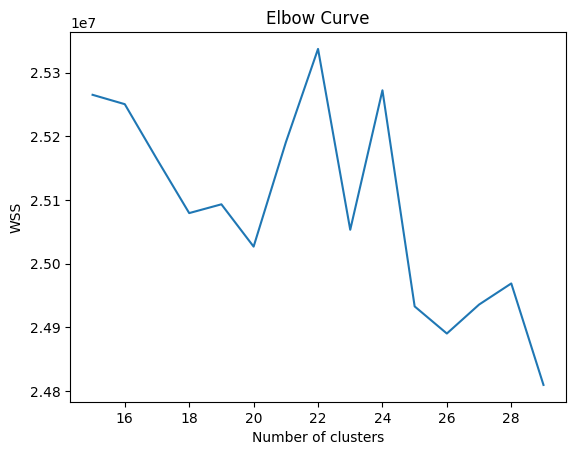

In [248]:
# plot the elbow curve
plt.plot(range(15, 30), wss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

## 29-30 clusters seem like a good number here

In [249]:
kmeans = KMeans(n_clusters=30, n_init=3, random_state=42, verbose=2)
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 35973660.0.
Iteration 1, inertia 26388964.0.
Iteration 2, inertia 26112688.0.
Iteration 3, inertia 26002320.0.
Iteration 4, inertia 25766264.0.
Iteration 5, inertia 25503872.0.
Iteration 6, inertia 25291192.0.
Iteration 7, inertia 25216064.0.
Iteration 8, inertia 25198390.0.
Iteration 9, inertia 25190138.0.
Iteration 10, inertia 25185350.0.
Iteration 11, inertia 25181608.0.
Iteration 12, inertia 25178938.0.
Iteration 13, inertia 25176918.0.
Iteration 14, inertia 25175488.0.
Iteration 15, inertia 25173888.0.
Iteration 16, inertia 25172624.0.
Iteration 17, inertia 25171306.0.
Iteration 18, inertia 25169860.0.
Iteration 19, inertia 25168360.0.
Iteration 20, inertia 25167298.0.
Iteration 21, inertia 25166450.0.
Iteration 22, inertia 25165660.0.
Iteration 23, inertia 25165008.0.
Iteration 24, inertia 25164500.0.
Iteration 25, inertia 25164162.0.
Iteration 26, inertia 25163926.0.
Iteration 27, inertia 25163768.0.
Iteration 28, inertia 25163686.0.


KMeans(n_clusters=30, n_init=3, random_state=42, verbose=2)

In [250]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: -0.078


## lets try again with a wider range 

In [251]:
# calculate WSS for k values 50 to 55
wss = []
for k in range(50, 55):
    kmeans = KMeans(n_clusters=k, n_init=3, random_state=42, verbose=2)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 35072276.0.
Iteration 1, inertia 26206532.0.
Iteration 2, inertia 25570818.0.
Iteration 3, inertia 25233834.0.
Iteration 4, inertia 25092492.0.
Iteration 5, inertia 25053932.0.
Iteration 6, inertia 25026370.0.
Iteration 7, inertia 24994386.0.
Iteration 8, inertia 24946864.0.
Iteration 9, inertia 24898654.0.
Iteration 10, inertia 24874482.0.
Iteration 11, inertia 24860258.0.
Iteration 12, inertia 24851292.0.
Iteration 13, inertia 24845756.0.
Iteration 14, inertia 24841904.0.
Iteration 15, inertia 24839546.0.
Iteration 16, inertia 24838296.0.
Iteration 17, inertia 24836968.0.
Iteration 18, inertia 24836256.0.
Iteration 19, inertia 24835714.0.
Iteration 20, inertia 24835348.0.
Iteration 21, inertia 24835146.0.
Iteration 22, inertia 24835038.0.
Iteration 23, inertia 24834908.0.
Iteration 24, inertia 24834788.0.
Iteration 25, inertia 24834698.0.
Iteration 26, inertia 24834630.0.
Iteration 27, inertia 24834506.0.
Iteration 28, inertia 24834360.0.


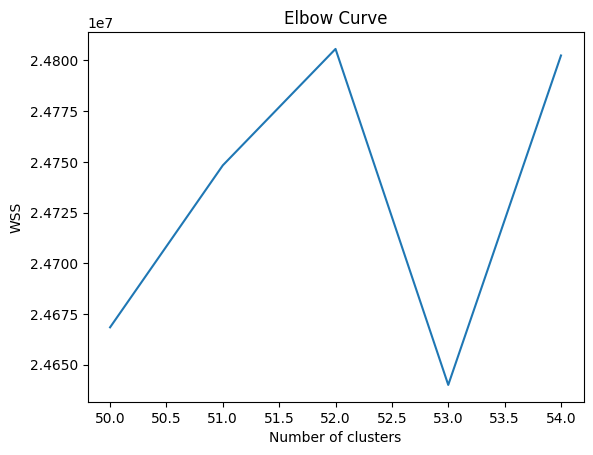

In [252]:
# plot the elbow curve
plt.plot(range(50, 55), wss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

## 53 clusters seem to have the best result

In [253]:
kmeans = KMeans(n_clusters=53, n_init=3, random_state=42, verbose=2)
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 35042824.0.
Iteration 1, inertia 26184746.0.
Iteration 2, inertia 25548834.0.
Iteration 3, inertia 25212072.0.
Iteration 4, inertia 25071482.0.
Iteration 5, inertia 25032758.0.
Iteration 6, inertia 25004678.0.
Iteration 7, inertia 24971478.0.
Iteration 8, inertia 24920872.0.
Iteration 9, inertia 24874220.0.
Iteration 10, inertia 24852032.0.
Iteration 11, inertia 24838726.0.
Iteration 12, inertia 24829872.0.
Iteration 13, inertia 24824766.0.
Iteration 14, inertia 24820888.0.
Iteration 15, inertia 24818562.0.
Iteration 16, inertia 24817080.0.
Iteration 17, inertia 24815886.0.
Iteration 18, inertia 24815186.0.
Iteration 19, inertia 24814642.0.
Iteration 20, inertia 24814274.0.
Iteration 21, inertia 24814112.0.
Iteration 22, inertia 24814004.0.
Iteration 23, inertia 24813894.0.
Iteration 24, inertia 24813726.0.
Iteration 25, inertia 24813608.0.
Iteration 26, inertia 24813520.0.
Iteration 27, inertia 24813368.0.
Iteration 28, inertia 24813194.0.


KMeans(n_clusters=53, n_init=3, random_state=42, verbose=2)

In [254]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: -0.080


In [376]:
# SAVED THE KMEANS MODEL WITH THIS
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:
# THIS IS TO LOAD THE MODEL 
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

In [334]:
# use the clusters to recommend similar courses
target_course = preprocessed_df.loc[preprocessed_df['CourseId'] == 'objective-c']['title_desc_cleaned'].tolist()
target_embedding = np.concatenate([wordembed_model.wv[word] for word in target_course])
target_embedding_padded = pad_sequences([target_embedding.reshape(1,-1).T], maxlen=max_len, dtype='float32', padding='post')
target_embedding_padded = target_embedding_padded.reshape(1,max_len)

target_course_cluster = kmeans.predict(target_embedding_padded)

In [335]:
similar_course_indices = np.where(kmeans.labels_ == target_course_cluster)[0]
similar_courses_test = data[similar_course_indices]
similar_course_ids = np.array(preprocessed_df.loc[preprocessed_df.index.isin(similar_course_indices), 'CourseId'])


## Perform cosine similarity on the cluster of the target course, to rank the top courses in a specific cluster

In [369]:
target_course = preprocessed_df.loc[preprocessed_df['CourseId'] == 'intro-async-parallel-dotnet4']['title_desc_cleaned'].tolist()
#target_course = preprocessed_df.loc[preprocessed_df['CourseId'] == 'objective-c']['title_desc_cleaned'].tolist()
target_embedding = np.concatenate([wordembed_model.wv[word] for word in target_course])
target_embedding_padded = pad_sequences([target_embedding.reshape(1,-1).T], maxlen=max_len, dtype='float32', padding='post')
target_embedding_padded = target_embedding_padded.reshape(1,max_len)

In [370]:
similarities_test = []
for course in similar_courses_test:
    course = course.reshape(1,-1)
    course_similarity = cosine_similarity(target_embedding_padded, course)[0][0]
    similarities_test.append(course_similarity)


In [373]:
course_indices = np.arange(len(similar_course_ids))
top_similarities_indices = np.argsort(similarities_test)[::-1][:10]
top_similarities_courses = course_indices[top_similarities_indices]
for i in range(len(top_similarities_indices)):
    similarity = similarities_test[top_similarities_indices[i]]
    course_id = course_indices[top_similarities_indices[i]]
    print(f"Course ID: {course_id}, Similarity score: {similarity:.7f}")

Course ID: 52, Similarity score: 1.0000000
Course ID: 88, Similarity score: 0.3562713
Course ID: 76, Similarity score: 0.3401274
Course ID: 7, Similarity score: 0.3363866
Course ID: 60, Similarity score: 0.3316570
Course ID: 643, Similarity score: 0.3244930
Course ID: 351, Similarity score: 0.3186388
Course ID: 173, Similarity score: 0.3184914
Course ID: 763, Similarity score: 0.3171753
Course ID: 717, Similarity score: 0.3144855


##### very odd results here, some recommended courses have a similarity score of 1 with itself [FIXED]


In [374]:
for i in range(len(top_similarities_indices)):
    similarity = similarities_test[top_similarities_indices[i]]
    course_id = course_indices[top_similarities_indices[i]]
    print(f"Course ID: {similar_course_ids[course_id]}, Similarity score: {similarity:.2f}")


Course ID: intro-async-parallel-dotnet4, Similarity score: 1.00
Course ID: js4cs, Similarity score: 0.36
Course ID: security-block, Similarity score: 0.34
Course ID: iis-certificates, Similarity score: 0.34
Course ID: fsintro, Similarity score: 0.33
Course ID: internationalization-angular-js-aspdotnet, Similarity score: 0.32
Course ID: java-persistence-api-21, Similarity score: 0.32
Course ID: mysql-fundamentals-part2, Similarity score: 0.32
Course ID: visual-studio-code-aspdotnet-projects, Similarity score: 0.32
Course ID: pmi-acp-agile-methodologies, Similarity score: 0.31


## Clustering did not have that much value, so we're sticking with this 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the embeddings for each course title and description
target_course = preprocessed_df.loc[preprocessed_df['CourseId'] == 'objective-c']['title_desc_cleaned'].tolist()
target_embedding = np.concatenate([wordembed_model.wv[word] for word in target_course])
max_len = max([len(np.concatenate([wordembed_model.wv[word] for word in row['title_desc_cleaned']])) for _, row in preprocessed_df.iterrows()])

target_embedding_padded = pad_sequences([target_embedding.reshape(1,-1).T], maxlen=max_len, dtype='float32', padding='post')
target_embedding_padded = target_embedding_padded.reshape(1,max_len)

# Compute the similarity scores between the target course and all other courses in the dataset
similarity_scores = {}
for index, row in preprocessed_df.iterrows():
    course_id = row['CourseId']
    course_title_desc = row['title_desc_cleaned']
    course_embedding = np.concatenate([wordembed_model.wv[word] for word in course_title_desc])

    course_embedding_padded = pad_sequences([course_embedding], maxlen=max_len, dtype='float32', padding='post').reshape(1,max_len)
    similarity_scores[course_id] = cosine_similarity(target_embedding_padded, course_embedding_padded)[0][0]
    
# Sort the courses by similarity score and return the top n courses
similar_courses = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20]

In [ ]:
similar_courses

## Experiment More With Clustering (100 clusters in k-means) (consider using DBSCAN) for clsuters too , but it's a refinement thing, we have a good enough result here

 When dealing with sparse vectors, using Euclidean distance as a similarity metric can result in misleading similarity scores because it fails to capture the relationship between the non-zero dimensions of the vectors. In other words, it treats all dimensions equally, including those that contain zero values, which can lead to inflated distance scores. Cosine similarity, on the other hand, is well-suited for sparse vectors because it measures the cosine of the angle between the two vectors, which reflects their similarity based on their non-zero dimensions.
 
 
 Regarding the Euclidean distance, it can be problematic when dealing with sparse vectors because it takes into account the magnitude of the vectors, not just their direction. If two vectors are of different lengths, it will result in an inaccurate similarity score.
 
 cosine similarity is a widely used metric in natural language processing tasks, including text similarity and recommendation systems, due to its ability to handle sparse vectors and its effectiveness in measuring the similarity between two vectors regardless of their magnitude. In our case, we are using word embeddings to represent the course titles and descriptions, which are sparse vectors with a lot of zeros due to the use of padding. Cosine similarity is a good fit for our data because it can effectively capture the semantic similarity between the course titles and descriptions, even in the presence of a large number of zeros. Additionally, it has been shown to outperform other similarity metrics, such as Euclidean distance and Jaccard similarity, in a variety of natural language processing tasks.